<a href="https://colab.research.google.com/github/MMSN5777SMBH/ml_exploration/blob/master/ml_expo_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd # load and manipulate data and for One-Hot Encoding
import numpy as np # calculate the mean and standard deviation

from __future__ import print_function
%matplotlib inline
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt # drawing graphs
import matplotlib.image as image

import pandas_profiling
plt.style.use("ggplot")
warnings.simplefilter("ignore")

from numpy import set_printoptions

from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

import seaborn as sns

from sklearn.tree import DecisionTreeClassifier # a classification tree
from sklearn.tree import plot_tree # draw a classification tree

from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn.model_selection import cross_val_score # cross validation
from sklearn.metrics import confusion_matrix # creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix

In [2]:
from yellowbrick.target import ClassBalance
from yellowbrick.model_selection import FeatureImportances

In [7]:

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg


In [9]:
# load data
# /datasets_228_482_diabetes.csv
filename = os.getcwd()+'/datasets_228_482_diabetes.csv'
#filename = '/datasets_228_482_diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
#df = pd.read_csv(filename, names=names)
df = pd.read_csv(filename)

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
# Create feature and label dfs
X = df.loc[:, df.columns != 'Outcome']
y = df.Outcome

In [38]:
# create training and testing data set. 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=1) # 0.25 x 0.8 = 0.2
    
    

In [39]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.22.2.post1.


In [40]:
df_dt = DecisionTreeClassifier(random_state=42)
df_dt = df_dt.fit(X_train, y_train)

In [41]:
print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))
print(len(X_test))
print(len(y_test))


587
587
104
104
77
77


In [42]:
df_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [43]:
print('Decision Tree Training Accuracy: {:.3f}'.format(accuracy_score(y_train, df_dt.predict(X_train))))
print('Decision Tree Val Accuracy: {:.3f}'.format(accuracy_score(y_val, df_dt.predict(X_val))))


Decision Tree Training Accuracy: 1.000
Decision Tree Val Accuracy: 0.683


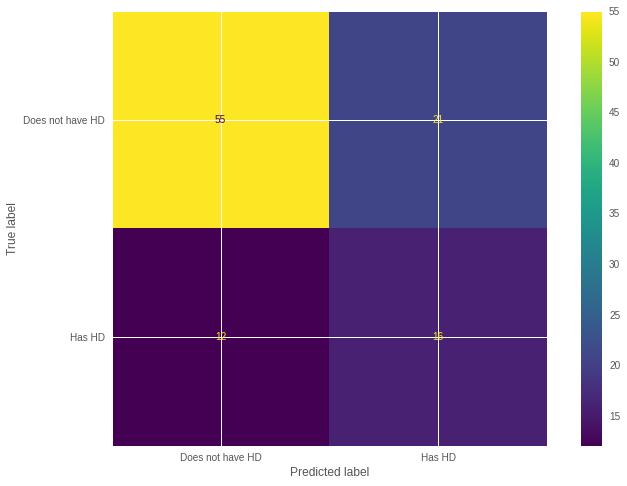

In [44]:
plot_confusion_matrix(df_dt, X_val, y_val, display_labels=["Does not have HD", "Has HD"])

In [45]:
# On test
print('Decision Tree Test Accuracy: {:.3f}'.format(accuracy_score(y_test, df_dt.predict(X_test))))


Decision Tree Test Accuracy: 0.818


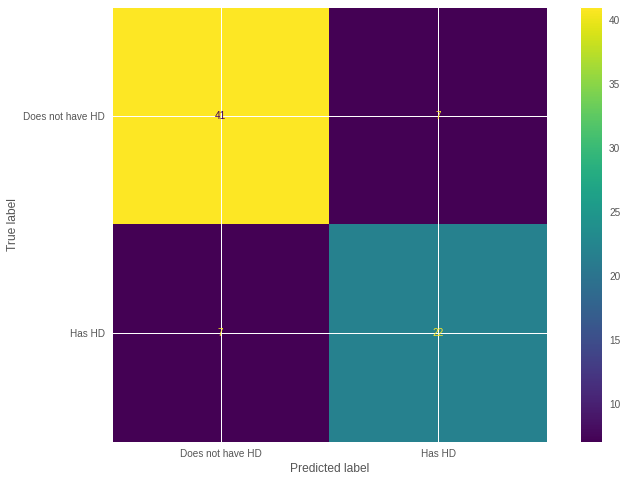

In [46]:
# On test

plot_confusion_matrix(df_dt, X_test, y_test, display_labels=["Does not have HD", "Has HD"])# On te

In [47]:
path = df_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = ccp_alphas[:-1]

df_dts = []
for ccp_alpha in ccp_alphas:
    df_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    df_dt.fit(X_train, y_train)
    df_dts.append(df_dt)

In [48]:
path1 = df_dt.cost_complexity_pruning_path(X_train, y_train)

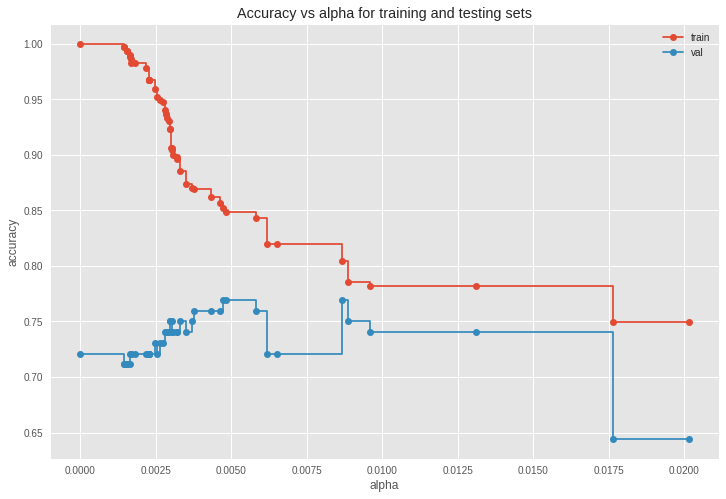

In [49]:
train_scores = [df_dt.score(X_train, y_train) for df_dt in df_dts]
test_scores = [df_dt.score(X_val, y_val) for df_dt in df_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="val", drawstyle="steps-post")
ax.legend()
plt.show()

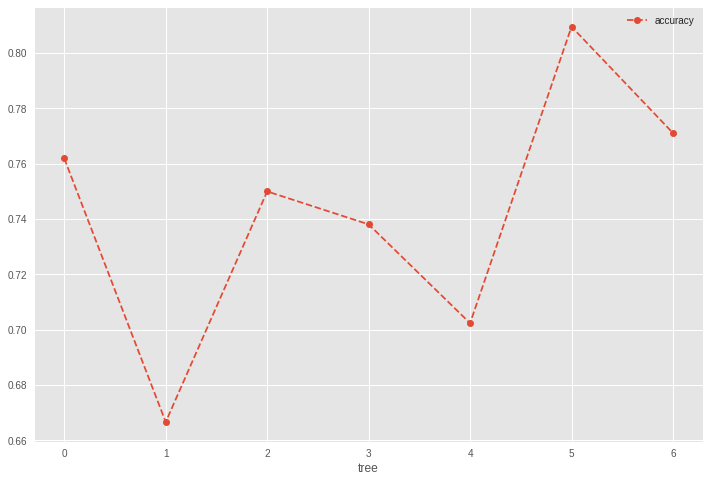

In [50]:
df_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0085)
scores = cross_val_score(df_dt, X_train, y_train, cv=7)
df_new = pd.DataFrame(data={'tree': range(7), 'accuracy': scores})

df_new.plot(x='tree', y='accuracy', marker='o', linestyle='--')

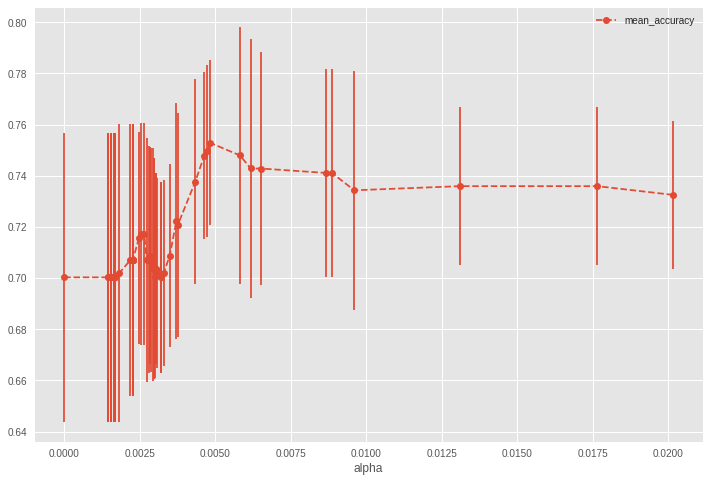

In [51]:
alpha_loop_values = []
for ccp_alpha in ccp_alphas:
    df_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(df_dt, X_train, y_train, cv=7)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
alpha_results = pd.DataFrame(alpha_loop_values, 
                             columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha', 
                   y='mean_accuracy', 
                   yerr='std', 
                   marker='o', 
                   linestyle='--')

In [52]:
alpha_results[(alpha_results['alpha']>0.004)
&
(alpha_results['alpha']<0.01)]

,alpha,mean_accuracy,std
37,0.004336,0.737665,0.040132
38,0.004638,0.747869,0.032708
39,0.004743,0.749570,0.033688
40,0.004816,0.752971,0.032331
41,0.005819,0.747951,0.050346
42,0.006175,0.742849,0.050483
43,0.006528,0.742828,0.045489
44,0.008670,0.741107,0.040803
45,0.008862,0.741107,0.040803
46,0.009603,0.734325,0.046676


In [53]:
# this works great (0.004816 with 0.1 and 0.15 splits)
ideal_ccp_alpha = 0.004816

In [54]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42, 
                                       ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train) 

In [55]:
print('Decision Tree Training Accuracy: {:.3f}'.format(accuracy_score(y_train, clf_dt_pruned.predict(X_train))))
print('Decision Tree Val Accuracy: {:.3f}'.format(accuracy_score(y_val, clf_dt_pruned.predict(X_val))))


Decision Tree Training Accuracy: 0.848
Decision Tree Val Accuracy: 0.769


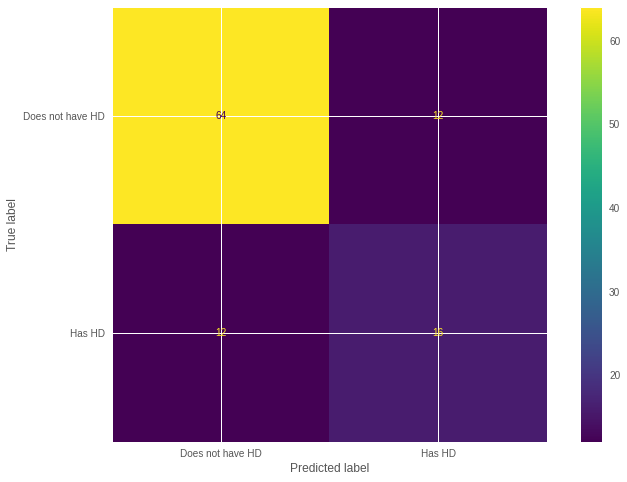

In [56]:
plot_confusion_matrix(clf_dt_pruned, 
                      X_val, 
                      y_val, 
                      display_labels=["Does not have HD", "Has HD"])

In [30]:
# earlier accuracy = 0.72
# new accuracy after (cv=7) = 0.77
# after messing up train/val/test split = 0.756

[Text(496.96875, 382.21875, 'Glucose <= 127.5\ngini = 0.46\nsamples = 587\nvalue = [376, 211]\nclass = No HD'),
 Text(261.5625, 331.25625, 'Age <= 34.5\ngini = 0.307\nsamples = 369\nvalue = [299, 70]\nclass = No HD'),
 Text(156.9375, 280.29375, 'Pregnancies <= 6.5\ngini = 0.196\nsamples = 264\nvalue = [235, 29]\nclass = No HD'),
 Text(104.625, 229.33124999999998, 'BMI <= 32.25\ngini = 0.159\nsamples = 252\nvalue = [230, 22]\nclass = No HD'),
 Text(52.3125, 178.36875, 'gini = 0.027\nsamples = 147\nvalue = [145, 2]\nclass = No HD'),
 Text(156.9375, 178.36875, 'DiabetesPedigreeFunction <= 0.745\ngini = 0.308\nsamples = 105\nvalue = [85, 20]\nclass = No HD'),
 Text(104.625, 127.40625, 'BMI <= 45.4\ngini = 0.249\nsamples = 89\nvalue = [76, 13]\nclass = No HD'),
 Text(52.3125, 76.44375000000002, 'gini = 0.206\nsamples = 86\nvalue = [76, 10]\nclass = No HD'),
 Text(156.9375, 76.44375000000002, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Yes HD'),
 Text(209.25, 127.40625, 'gini = 0.492\n

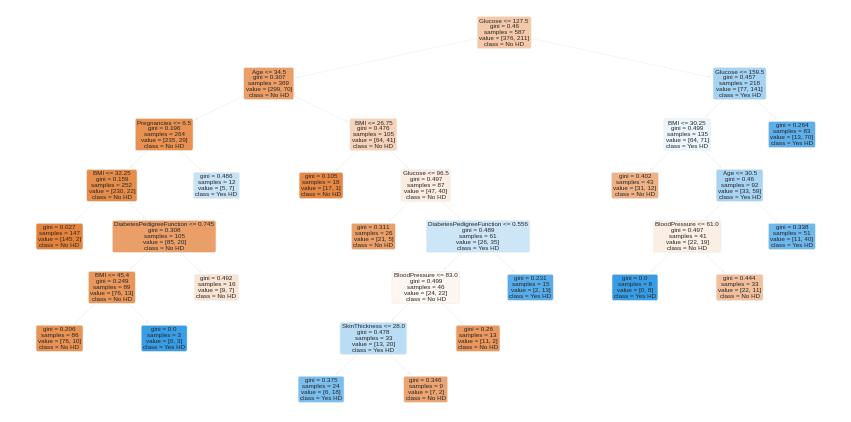

In [57]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned, 
          filled=True, 
          rounded=True, 
          class_names=["No HD", "Yes HD"], 
          feature_names=X.columns) 

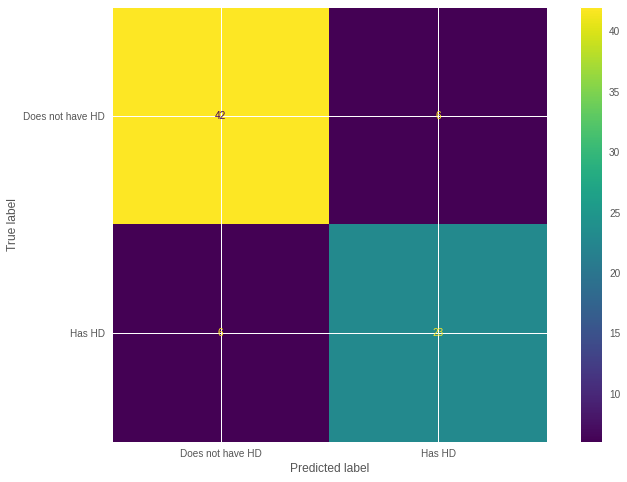

In [58]:
# On test set
plot_confusion_matrix(clf_dt_pruned, 
                      X_test, 
                      y_test, 
                      display_labels=["Does not have HD", "Has HD"])

In [59]:
# On test
print('Decision Tree Test Accuracy: {:.3f}'.format(accuracy_score(y_test, clf_dt_pruned.predict(X_test))))

Decision Tree Test Accuracy: 0.844


In [60]:
# for cv =5, accuracy on test set 0.81

# for cv = 7, accuracy on test set =  84.4

# 0.8 (after messing up splits)

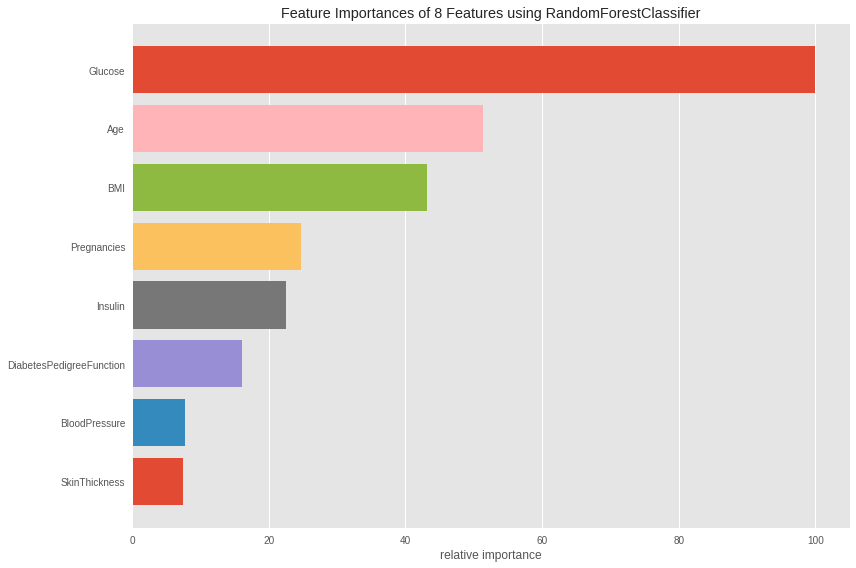

In [33]:
from yellowbrick.model_selection import FeatureImportances
plt.rcParams['figure.figsize'] = (12,8)
plt.style.use("ggplot")

rf = RandomForestClassifier(bootstrap='True', class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=1, verbose=False,
            warm_start=False)

viz = FeatureImportances(rf)
viz.fit(X_train, y_train)
viz.show();

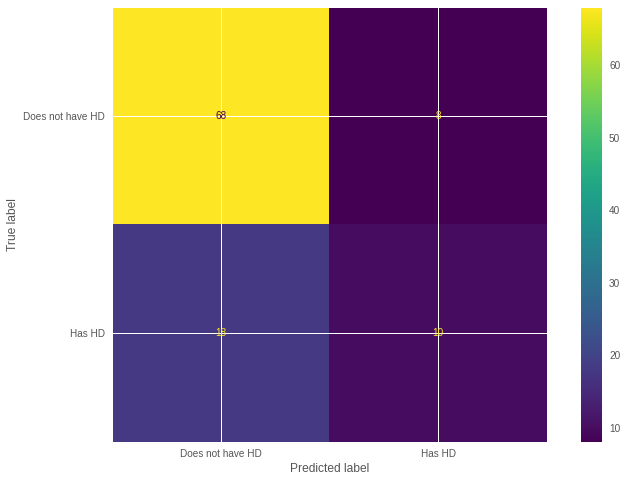

In [61]:
plot_confusion_matrix(rf, 
                      X_val, 
                      y_val, 
                      display_labels=["Does not have HD", "Has HD"])

In [62]:
print('Decision Tree Training Accuracy: {:.3f}'.format(accuracy_score(y_train, rf.predict(X_train))))

Decision Tree Training Accuracy: 0.811


In [63]:
print('Decision Tree val Accuracy: {:.3f}'.format(accuracy_score(y_val, rf.predict(X_val))))
print('Decision Tree Test Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))


Decision Tree val Accuracy: 0.750
Decision Tree Test Accuracy: 0.766


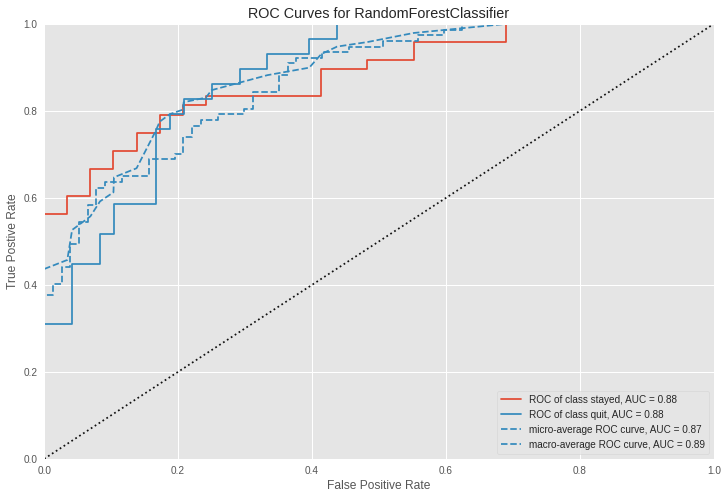

In [41]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(rf, classes=["stayed", "quit"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.poof();

Logistic Regression Accuracy: 0.753


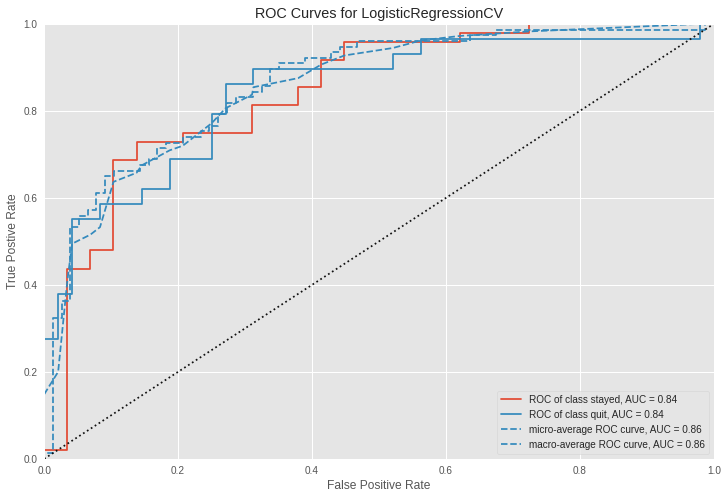

In [42]:
from sklearn.linear_model import LogisticRegressionCV

logit = LogisticRegressionCV(random_state=1, n_jobs=-1,max_iter=500,
                             cv=10)

lr = logit.fit(X_train, y_train)

print('Logistic Regression Accuracy: {:.3f}'.format(accuracy_score(y_test, lr.predict(X_test))))

visualizer = ROCAUC(lr, classes=["stayed", "quit"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.poof();

Automatically created module for IPython interactive environment
Feature ranking:
1. feature 1 (0.366391)
2. feature 7 (0.188287)
3. feature 5 (0.158349)
4. feature 0 (0.090325)
5. feature 4 (0.082289)
6. feature 6 (0.059025)
7. feature 2 (0.028190)
8. feature 3 (0.027143)


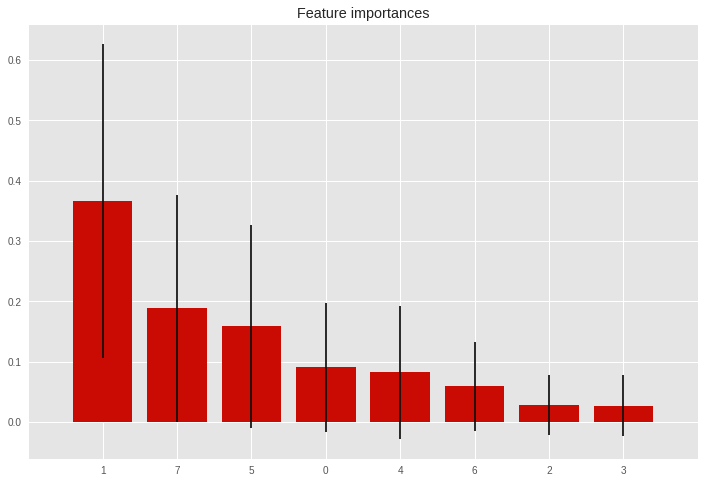

In [43]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier



rf.fit(X_train, y_train)
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [44]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
